#### Khoa Điện tử Viễn thông- Trường Đại học Khoa học tự nhiên<br>
-------------------------------------------------------------------------
# <center>Bài 3: TÍN HIỆU VÀ HỆ THỐNG RỜI RẠC TRONG MIỀN TẦN SỐ </center><br>
Nhóm: ca02
Họ và tên: Nguyễn Anh Tuấn
MSSV:20200399
#### Mục đích:
> * Thực hiện biến đổi Fourier rời rạc
> * Phân tích phổ biên độ và phổ pha của các tín hiệu rời rạc thời gian  <br>
> * Minh họa các tính chất trong miền tần số của hệ thống rời rạc thời gian LTI<br>

## Tóm tắt lý thuyết : <br>
> Trong bài thực hành trước, các tính chất trong miền thời gian của tín hiệu và hệ thống rời rạc thời gian đã được khảo sát. Tuy nhiên, nhiều tính chất quan trọng của tín hiệu và hệ thống rời rạc thời gian chỉ được thể hiện khi biểu diễn chúng trong miền tần số.<br>

## A. Tín hiệu rời rạc thời gian trong miền tần số <br>
### 1. Biến đổi Fourier rời rạc thời gian (DTFT) <br>
Biến đổi Fourier rời rạc thời gian của tín hiệu x[n] và biến đổi ngược của nó được định nghĩa bởi phương trình 1 và 2: <br>
$$X[\Omega]=DTFT(x[n])=\sum_{n=-\infty}^{+\infty}x[n]e^{-j\Omega n} (1)$$
$$x[n]=IDTFT(X[\Omega])=\frac{1}{2\pi}\sum_{n=-\pi}^{\pi}X[\Omega]e^{j\Omega n}d \Omega(2)$$ 
$X(\Omega)$ có thể được biểu diễn dưới dạng biên độ và pha như ở phương trình 3: <br>
$$X[\Omega] = |X[\Omega]|e^{j.arg(X[\Omega])} (3)$$
Khi đó $X(\Omega)$ được gọi là phổ tín biên độ tín hiệu và $arg(X[\Omega])$ được gọi là phổ pha của tín hiệu x[n]
### 2. Biến đổi Fourier rời rạc
> Cho công thức biến đổi Fourier rời rạc (DFT) như sau: <br>
$$X(k)=\sum_{n=0}^{N-1} x(n)e^{\frac{-2j\pi kn}{N}}$$ 

Trong đó:
* N là số mẫu <br>
* n là mẫu hiện tại <br>
* $x_{n}$ là gí trị của tín hiệu tại thời gian n <br>
* k là tần số hiện tại <br>
* $X_{k}$ là kết quả của DFT <br>

Thêm thư viện vào project

In [1]:
#Thêm thư viện
import matplotlib.pyplot as plt
from scipy import signal
import numpy as np
import IPython.display as ipd #Thêm thư viện để display Audio

Bài 1a: <br>
Đoạn chương trình sau đây định nghĩa hàm tính DTFT

In [5]:
def dtft(x):
    L = len(x)
    w = np.arange(-2*np.pi, 2*np.pi, 4*np.pi/512) #Omega từ -2pi đến 2pi
    w = w.reshape(len(w),1) #Chuyển vị
    n = np.arange(L)
    e = np.exp(-1j *w*n) # Lưu  ý: ta ghi 1j để biểu thị j là phần ảo của số phức
    X = np.dot(e, x )#Nhân vô hướng
    return w, X

Bài 1b:<br>
Đoạn code sau đây vẽ thành phần thực, thành phần ảo, phổ biên độ và phổ pha của biến đổi DTFT đối với tín hiệu x(n)

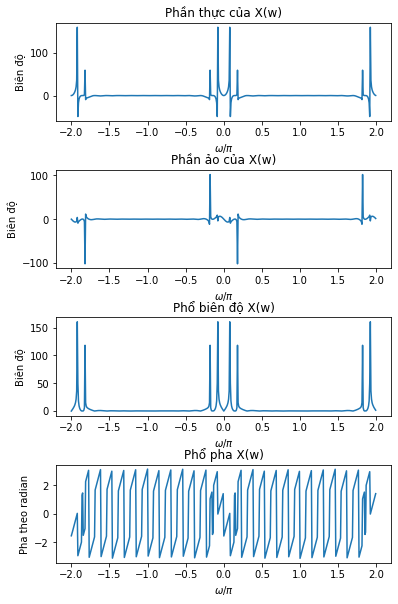

In [6]:
N = 500 # Số mẫu
T = 0.5/N # Chu kỳ lấy mẫu
t = np.linspace(0, T*N, N)
x = np.sin(2 * np.pi*40 * t) + 0.5 * np.sin(2 * np.pi *90* t)
w, X = dtft(x)
plt.subplot(4, 1,1 )
plt.plot(w/np.pi, X.real)
plt.title('Phần thực của X(w)') 
plt.xlabel('$\omega/\pi$')
plt.ylabel('Biên độ')
plt.subplot(4,1,2) 
plt.plot(w/np.pi,X.imag)
plt.title('Phần ảo của X(w)') 
plt.xlabel('$\omega/\pi$')
plt.ylabel('Biên độ')
plt.subplot(4,1,3) 
plt.plot(w/np.pi,np.abs(X))
plt.title('Phổ biên độ X(w)') 
plt.xlabel('$\omega/\pi$')
plt.ylabel('Biên độ')
plt.subplot(4,1,4) 
plt.plot(w/np.pi,np.angle(X, deg = False))
plt.title('Phổ pha X(w)') 
plt.xlabel('$\omega/\pi$')
plt.ylabel('Pha theo radian')
plt.subplots_adjust(top = 2, hspace=0.5)


Câu 1c: <br>
Cho biết $X(\Omega)$ có tuần hoàn không? Nếu tuần hoàn thì chu kì tuần hoàn là bao nhiêu?

In [7]:
Tuần hoàn với chu kỳ 2*pi

SyntaxError: invalid syntax (1744702002.py, line 1)

Câu 1d:<br>
Ta có thể thử hiện vẽ phổ biên độ và phổ pha bằng hàm $freqz()$ trong thư viện $signal$

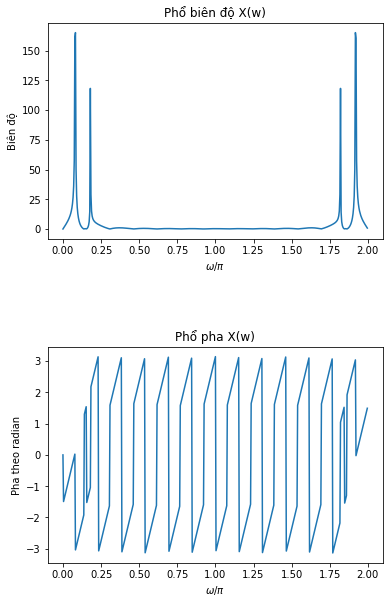

In [ ]:
N = 500 # Số mẫu
T = 0.5/N # Chu kỳ lấy mẫu
n = np.linspace(0, T*N, N)
x = np.sin(40 * 2 * np.pi * n) + 0.5 * np.sin(90 * 2 * np.pi * n)
a = [1]
w, X = signal.freqz(x, a, worN=512, whole=True)
#worN = 512: Rời rạc hóa biến đổi
#whole = False (Mặc định) -> Vẽ từ 0 đến fs/2(0 -> Pi), True -> vẽ từ 0 đến fs (0 -> 2*Pi)
plt.subplot(2,1,1) 
plt.plot(w/np.pi,np.abs(X))
plt.title('Phổ biên độ X(w)') 
plt.xlabel('$\omega/\pi$')
plt.ylabel('Biên độ')
plt.subplot(2,1,2) 
plt.plot(w/np.pi,np.angle(X, deg = False)) #Vẽ theo radian
plt.title('Phổ pha X(w)') 
plt.xlabel('$\omega/\pi$')
plt.ylabel('Pha theo radian')
plt.subplots_adjust(top = 2, hspace=0.5)

Câu 1e: <br>
Nhận xét về dải tần số của tín hiệu x

In [ ]:
#nhận xét: dải tần số của tín hiệu rời rạc là một dải tần bất kỳ rộng 2π

Bài 2a: <br>
> Cho công thức biến đổi Fourier rời rạc (DFT) như sau: <br>
$$X(k)=\sum_{n=0}^{N-1} x(n)e^{-j2 \pi k n/N}$$
Trong đó: <br>
* N là số mẫu <br>
* n là mẫu hiện tại <br>
* $x_n$ là gí trị của tín hiệu tại thời gian n <br>
* k là tần số hiện tại <br>
* $X_k$ là kết quả của DFT <br>
 
Đoạn chương trình sau định nghĩa một hàm để tính DFT <br>


In [8]:
def dft(x):
  N = len(x)
  X = np.zeros(N, dtype = complex)
  for k in range(N):
    X[k] = 0
    for n in range(N):
      X[k] = X[k] + x[n]*np.exp(-2j*np.pi*k*n/N) 
  return X

Cách khác:

In [9]:
def dft1(x):
    """
    Tính biến đổi Fourier 1 chiều với đầu vào x
    :param x: (array)
    """

    N = len(x) #Lấy chiều dài của x
    n = np.arange(N)
    k = n.reshape((N, 1)) #Chuyển n thành mảng N hàng 1 cột
    e = np.exp(-2j * np.pi * k * n / N)
    return np.dot(e, x) #Nhân vô hướng 2 ma trận

Bài 2b: <br>
Đoạn chương trình sau đây thực hiện biến đổi DFT của tín hiệu x. Sau đó vẽ phổ biên độ và phổ pha của tín hiệu đó

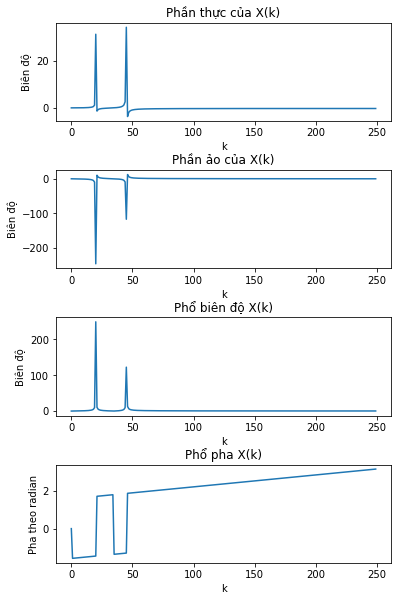

In [10]:
N = 500 # Số mẫu
T = 0.5/N # Chu kỳ lấy mẫu
n = np.linspace(0, T*N, N)
x = np.sin(40 * 2 * np.pi * n) + 0.5 * np.sin(90 * 2 * np.pi * n)
k = np.arange(len(x)//2) #Vẽ 1 nữa
X = dft(x)
X = X[:len(X)//2]#Lấy 1 nữa
plt.subplot(4, 1,1 )
plt.plot(k, X.real)
plt.title('Phần thực của X(k)') 
plt.xlabel('k')
plt.ylabel('Biên độ')
plt.subplot(4,1,2) 
plt.plot(k,X.imag)
plt.title('Phần ảo của X(k)') 
plt.xlabel('k')
plt.ylabel('Biên độ')
plt.subplot(4,1,3) 
plt.plot(k,np.abs(X))
plt.title('Phổ biên độ X(k)') 
plt.xlabel('k')
plt.ylabel('Biên độ')
plt.subplot(4,1,4) 
plt.plot(k,np.angle(X, deg = False)) #Vẽ theo radian
plt.title('Phổ pha X(k)') 
plt.xlabel('k')
plt.ylabel('Pha theo radian')
plt.subplots_adjust(top = 2, hspace=0.5)

Bài 2c: <br>
Thực hiện lại với hàm $freqz()$ <br>
Khai báo $worN = 512$ sẽ giúp rời rạc hóa biến đổi thành 512 mẫu

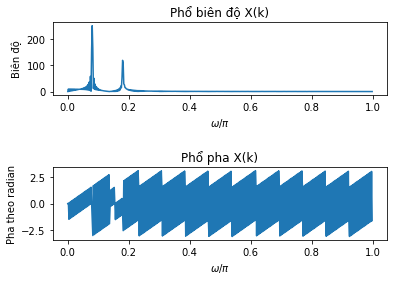

In [11]:
N = 500 # Số mẫu
T = 0.5/N # Chu kỳ lấy mẫu
n = np.linspace(0, T*N, N)
x = np.sin(40 * 2 * np.pi * n) + 0.5 * np.sin(90 * 2 * np.pi * n)
a = [1]
w, X = signal.freqz(x, a, worN=512, whole=False)
#worN = 512: Rời rạc hóa biến đổi
#whole = False (Mặc định) -> Vẽ từ 0 đến fs/2(0 -> Pi), True -> vẽ từ 0 đến fs (0 -> 2*Pi)

plt.subplot(2,1,1) 
plt.plot(w/np.pi,np.abs(X))
plt.title('Phổ biên độ X(k)') 
plt.xlabel('$\omega/\pi$')
plt.ylabel('Biên độ')
plt.subplot(2,1,2) 
plt.plot(w/np.pi,np.angle(X, deg = False)) #Vẽ theo radian
plt.title('Phổ pha X(k)') 
plt.xlabel('$\omega/\pi$')
plt.ylabel('Pha theo radian')

plt.subplots_adjust(hspace=1)

Bài 2d: <br>
Vẽ lại bài 2c theo dB và tần số Hz

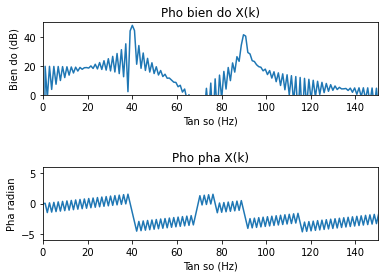

In [12]:
N = 500 # Số mẫu
T = 0.5/N # Chu kỳ lấy mẫu
t = np.linspace(0, T*N, N)
x = np.sin(40 * 2 * np.pi * t) + 0.5 * np.sin(90 * 2 * np.pi * t)
a = [1]
w, X = signal.freqz(x, a, worN=512, whole=False)
#worN = 512: Rời rạc biến đổi Fourier 

plt.subplot(2,1,1) 
plt.plot(w/(2*np.pi*T),20*np.log10(np.abs(X)))
plt.xlim(0, 150)
plt.ylim(0, 50)
plt.title('Pho bien do X(k)') 
plt.xlabel('Tan so (Hz)')
plt.ylabel('Bien do (dB)')
plt.subplot(2,1,2) 
plt.plot(w/(2*np.pi*T),np.unwrap(np.angle(X, deg = False))) #Vẽ theo radian
plt.xlim(0, 150)
plt.ylim(-6, 6)
plt.title('Pho pha X(k)') 
plt.xlabel('Tan so (Hz)')
plt.ylabel('Pha radian')
plt.subplots_adjust(hspace=1)

Bài 2e: <br>
Do DTFT và DFT thực hiện khá chậm với số mẫu lớn nên chúng ta phải dùng thuật toán FFT <br>
Đoạn chương trình sau đây thực hiện biến đổi Fourier sử dụng FFT

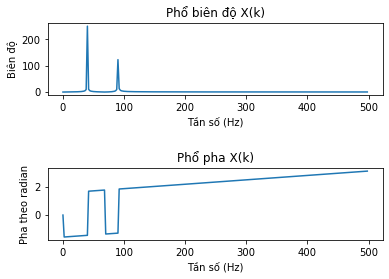

In [13]:
from scipy import fftpack as fft
N = 500 # Số mẫu
T = 0.5/N # Chu kỳ lấy mẫu
n = np.linspace(0, T*N, N)
 
x = np.sin(40 * 2 * np.pi * n) + 0.5 * np.sin(90 * 2 * np.pi * n)

X = fft.fft(x)

#tf = np.linspace(0, 1/(2*T), N//2) # Vẽ 1 nửa
tf = fft.fftfreq(N, T)[0:N//2]

plt.subplot(2,1,1) 
plt.plot(tf,np.abs(X[0:N//2]))
plt.title('Phổ biên độ X(k)') 
plt.xlabel('Tần số (Hz)')
plt.ylabel('Biên độ')
plt.subplot(2,1,2) 
plt.plot(tf,np.angle(X[0:N//2], deg = False)) #Vẽ theo radian
plt.title('Phổ pha X(k)') 
plt.xlabel('Tần số (Hz)')
plt.ylabel('Pha theo radian')
plt.subplots_adjust(hspace=1)

Bài 3a: <br>
Hàm sau đây thực hiện nhân chập vòng tròn của 2 tín hiệu x1 và x2

In [31]:
def circonv(x1, x2):
  L1 = len(x1)
  L2 = len(x2)
  if L1 != L2:
    print('Lỗi! Hai tín hiệu không bằng nhau')
  y = np.zeros(L1)
  x2[1:] = x2[L2-1:0:-1]
  x2tr = x2
  for k in range(L1):
    sh = np.roll(x2tr, k)# Dịch vòng tròn
    h = x1*sh
    y[k] = sum(h)
  return y

Bài 3b: <br>
Cho 2 tín hiệu: <br>
$g1 = [1, 2, 3, 4, 5, 6]$ <br>
$g2 = [1,- 2, 3, 3, -2, 1]$ <br>
Thực hiện nhân chập vòng tròn $g12[n] = g1[n] \otimes g2[n] $ sử dụng hàm $circonv$

In [32]:
g1 = [1, 2, 3, 4, 5, 6]
g2 = [1, -2, 3, 3, -2, 1]

g12 = circonv(g1, g2)
print(g12)


[12. 28. 14.  0. 16. 14.]


Bài 3c: <br>
Gọi $G1[k], G2[k], G12[k]$ lần lượt là biến đổi DFT của $g1[n], g2[n], g12[n]$. <br>
Tính $G1[k], G2[k], G12[k]$ sử dụng hàm $dft$. So sánh biên độ $G12[k]$ với $G12A[k]=G1[k]*G2[k]$

[21.+0.00000000e+00j -3.+5.19615242e+00j -3.+1.73205081e+00j
 -3.-1.28625053e-14j -3.-1.73205081e+00j -3.-5.19615242e+00j]
[ 4.+0.00000000e+00j -3.-1.73205081e+00j  4.+6.92820323e+00j
  0.-3.49086236e-15j  4.-6.92820323e+00j -3.+1.73205081e+00j]
[8.40000000e+01 2.07846097e+01 2.77128129e+01 5.78206604e-14
 2.77128129e+01 2.07846097e+01]
[8.40000000e+01 2.07846097e+01 2.77128129e+01 1.04725871e-14
 2.77128129e+01 2.07846097e+01]


d:\anaconda3\lib\site-packages\numpy\ma\core.py:3379: ComplexWarning: Casting complex values to real discards the imaginary part
  _data[indx] = dval
d:\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
d:\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
d:\anaconda3\lib\site-packages\numpy\ma\core.py:3379: ComplexWarning: Casting complex values to real discards the imaginary part
  _data[indx] = dval
d:\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


<StemContainer object of 3 artists>

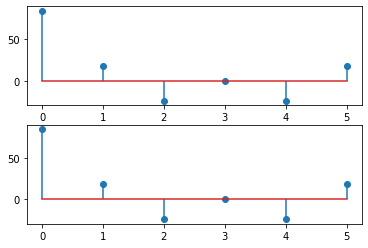

In [33]:
g1=[1,2,3,4,5,6]
g2=[1,-2,3,3,-2,1]
g12=[12, 14, 16,  0, 14, 28]
G1=dft(g1)
G2=dft(g2)
G12=dft(g12)
G12A=G1*G2
print(G1)
print(G2)
print(abs(G12))
print(abs(G1*G2))
n=np.arange(6)
plt.subplot(2,1,1)
plt.stem(n,G12)
plt.subplot(2,1,2)
plt.stem(n,G12A)
#so sánh biên độ ta thấy kết quả của G12 và G12A có kết quả bằng nhau

Bài 3d: <br>
Minh họa về liên hệ giữa nhân chập trong miền thời gian và nhân thường trong miền tần số sử dụng hàm convolve và fft <br>
Cho 2 tín hiệu: <br>
$x = e^{-10.1*n}$ <br>
$y = sin(2*\pi*5*n)$ <br>
Số mẫu: N = 128 <br>
Tần số lấy mẫu fs = 100
Thêm 5 phần tử 0 vào cuối mỗi tín hiệu <br>
Thực hiện nhân chập $xy[n] = x[n] \otimes y[n] $ sử dụng hàm $convolve$ <br>
Gọi $X[k], Y[k]$ lần lượt là biến đổi DFT của $x[n], y[n]$. <br>
Tính $XY[k] = X[k] * Y[k]$ sau đó dùng hàm ifft để biến đổi ngược và so sánh với tín hiệu xy được nhân chập ở trên <br><br>
*Lưu ý*: <br>
* Vì hàm covolve không nhân chập vòng tròn như FFT thực hiện kiểu nhân chập vòng tròn nên ta cần mở rộng tín hiệu vào để đủ không gian thực hiện FFT. <br>
* Chúng ta thêm 0 vào tín hiệu trong miền thời gian không thay đổi kết quả nhân chập nhưng để đảm bảo đủ không gian cho biến đổi FFT vì FFT thực hiện nhân chập vòng tròn.<br>
* Chiều dài ít nhất cho biến đổi FFT là L = L1 + L2 - 1


128


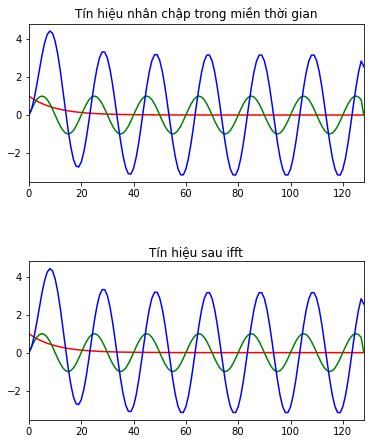

In [34]:
N = 128
fs = 100
n = np.arange(N)/fs
Z = np.zeros(N)
x = np.exp(-10.1*n)
y = np.sin(2*np.pi*5*n)
print(len(x))
x_samples = np.hstack([x, Z]) #Thêm N phần tử 0 vào mảng x_samples
y_samples = np.hstack([y, Z]) #Thêm N phần tử 0 vào mảng y_samples

xy = np.convolve(x_samples, y_samples)
xy_ifft = fft.ifft(fft.fft(x_samples) * fft.fft(y_samples)).real


plt.subplot(2, 1 ,1)
plt.title('Tín hiệu nhân chập trong miền thời gian')
plt.plot(x_samples, 'r')
plt.plot(y_samples, 'g')
plt.plot(xy, 'b')
plt.xlim((0,N))

plt.subplot(2, 1, 2)
plt.title('Tín hiệu sau ifft')
plt.plot(x_samples, 'r')
plt.plot(y_samples, 'g')
plt.plot(xy_ifft, 'b')
plt.xlim((0,N))

plt.subplots_adjust(top = 1.5, hspace=0.5)



Bài 3e: <br>
Cho tín hiệu $x[n] = [0, 0, 0, 0, 0, 1, 1.5, 1.7, 2, 1.5, 1, 0.5, 0, 0, 0, 0, 0]$ Sử dụng hàm subplot chia biểu đồ ra làm 2 phần: <br>
> *  Phần 1: Sử dụng hàm plot vẽ $ |X[Ω]| = |DTFT(x[n])|$ với $\Omega$ chạy từ $0 -> \pi$
> * Phần 2: Sử dụng hàm stem vẽ $|X[k]| = |DFT(x[n])|$ với k từ 0 -> 8 <br>
Nhận xét 

In [47]:
def dtft2(x):
    L = len(x)
    w = np.arange(0, np.pi, np.pi/512) #Omega từ 0 đến pi
    w = w.reshape(len(w),1) #Chuyển vị
    n = np.arange(L)
    e = np.exp(-1j *w*n) # Lưu  ý: ta ghi 1j để biểu thị j là phần ảo của số phức
    X = np.dot(e, x )#Nhân vô hướng
    return w, X

d:\anaconda3\lib\site-packages\numpy\ma\core.py:3379: ComplexWarning: Casting complex values to real discards the imaginary part
  _data[indx] = dval
d:\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
d:\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


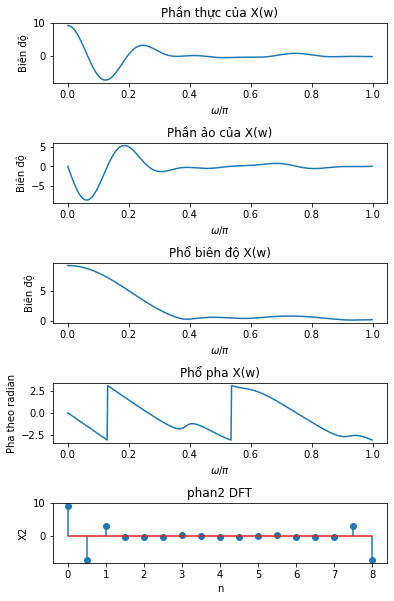

In [48]:
x=[0, 0, 0, 0, 0, 1, 1.5, 1.7, 2, 1.5, 1, 0.5, 0, 0, 0, 0, 0]

n2=np.arange(0,8.5,0.5);
w, X = dtft2(x)
plt.subplot(5, 1,1 )
plt.plot(w/np.pi, X.real)
plt.title('Phần thực của X(w)') 
plt.xlabel('$\omega/\pi$')
plt.ylabel('Biên độ')
plt.subplot(5,1,2) 
plt.plot(w/np.pi,X.imag)
plt.title('Phần ảo của X(w)') 
plt.xlabel('$\omega/\pi$')
plt.ylabel('Biên độ')
plt.subplot(5,1,3) 
plt.plot(w/np.pi,np.abs(X))
plt.title('Phổ biên độ X(w)') 
plt.xlabel('$\omega/\pi$')
plt.ylabel('Biên độ')
plt.subplot(5,1,4) 
plt.plot(w/np.pi,np.angle(X, deg = False))
plt.title('Phổ pha X(w)') 
plt.xlabel('$\omega/\pi$')
plt.ylabel('Pha theo radian')

X2=dft(x);
plt.subplot(5,1,5)
plt.stem(n2,X2)
plt.title('phan2 DFT')
plt.xlabel('n')
plt.ylabel('X2')
plt.subplots_adjust(top = 2, hspace=1)

Bài 4a: <br>
Vẽ phổ biên độ của tín hiệu x sau sử dụng hàm freqz và vẽ theo đơn vị Hz

Text(0, 0.5, 'Bien do (dB)')

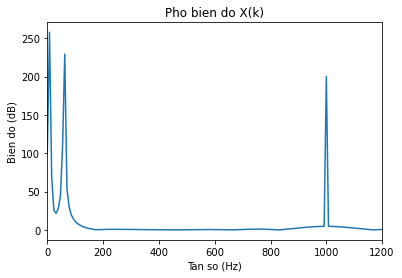

In [49]:
sampleRate = 8000 
nyquistRate = sampleRate/2
nSamples = 2000
n = np.arange(nSamples)/sampleRate
x = 0.4*np.sin(2*np.pi*10*n+0.1) +0.5*np.sin(2*np.pi*60*n) + 0.2*np.sin(2*np.pi*1000*n+0.1)

a = [1]
w, X = signal.freqz(x, a, worN=512, whole=False)


plt.plot(w/np.pi*nyquistRate,abs(X))
plt.xlim(0, 1200)
plt.title('Pho bien do X(k)') 
plt.xlabel('Tan so (Hz)')
plt.ylabel('Bien do (dB)')


Bài 4b: <br>
Vẽ lại phổ biên độ của tín hiệu x ở trên theo giai dB

Text(0, 0.5, 'Bien do (dB)')

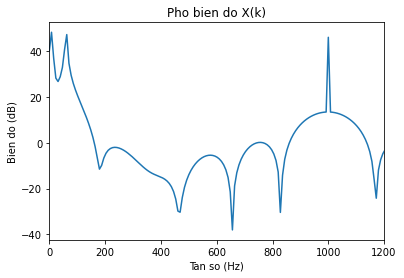

In [50]:
sampleRate = 8000 
nyquistRate = sampleRate/2
nSamples = 2000
n = np.arange(nSamples)/sampleRate
x = 0.4*np.sin(2*np.pi*10*n+0.1) +0.5*np.sin(2*np.pi*60*n) + 0.2*np.sin(2*np.pi*1000*n+0.1)

a = [1]
w, X = signal.freqz(x, a, worN=512, whole=False)


plt.plot(w/np.pi*nyquistRate,20*np.log10(abs(X)))
plt.xlim(0, 1200)
plt.title('Pho bien do X(k)') 
plt.xlabel('Tan so (Hz)')
plt.ylabel('Bien do (dB)')

Bài 4c: <br>
Vẽ lại phổ biên độ của tín hiệu x sử dụng hàm fft

Text(0, 0.5, 'Biên độ')

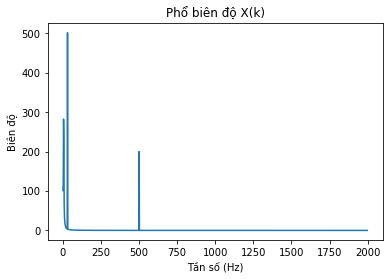

In [51]:
from scipy import fftpack as fft
sampleRate = 8000 
nyquistRate = sampleRate/2
nSamples = 2000
n = np.arange(nSamples)/sampleRate

x = 0.4*np.sin(2*np.pi*10*n+0.1) +0.5*np.sin(2*np.pi*60*n) + 0.2*np.sin(2*np.pi*1000*n+0.1)

X = fft.fft(x)

#tf = np.linspace(0, 1/(2*T), N//2) # Vẽ 1 nửa
tf = fft.fftfreq(nSamples, 1/nyquistRate)[0:nSamples//2]

plt.plot(tf,np.abs(X[0:nSamples//2]))
plt.title('Phổ biên độ X(k)') 
plt.xlabel('Tần số (Hz)')
plt.ylabel('Biên độ')

Bài 4d: <br>
Hoàn thành đoạn code để phân tích phổ của tín hiệu âm thanh cho sẵn sử dụng hàm fft() <br>


C:\Users\Laptop Nam phong\AppData\Local\Temp\ipykernel_1204\93598613.py:4: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs, s = wavfile.read(file_name)


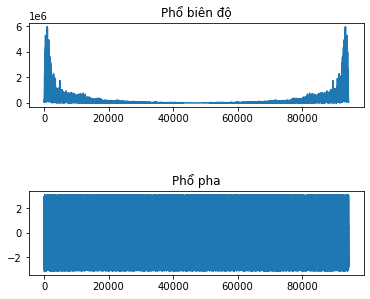

In [52]:
from scipy.io import wavfile
from scipy import fftpack as fft
file_name= '180960__kleeb__gunshot.wav'
fs, s = wavfile.read(file_name)
s = s[:,0] #Lấy 1 kênh vì audio có 2 kênh
N = len(s) # số mẫu
T = 1/fs
S = fft.fft(s)
plt.subplot(2,1,1)
plt.title('Phổ biên độ')
plt.plot(np.abs(S))
plt.subplot(2,1,2)
plt.title('Phổ pha')
plt.plot(np.angle(S, deg = False))
plt.subplots_adjust(top = 1, hspace=1)


Bài 4e: <br>
Thực hiện lại bài 4a với hàm $freqz()$

C:\Users\Laptop Nam phong\AppData\Local\Temp\ipykernel_1204\140069041.py:5: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs, s = wavfile.read(file_name)


(94398, 2)
94398


Text(0, 0.5, 'Biên độ')

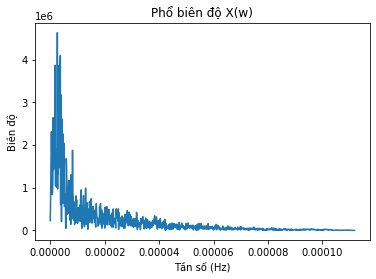

In [53]:
from scipy.io import wavfile
from scipy import fftpack as fft
from scipy import signal
file_name= '180960__kleeb__gunshot.wav'
fs, s = wavfile.read(file_name)

print(s.shape) #Kiểm tra số kênh
s = s[:,0] #Lấy 1 kênh
N = len(s) # số mẫu
print(N)
T = 1/fs
a = [1]
w, X = signal.freqz(s, a, worN=1024, whole=False)
plt.plot(w/2*np.pi*T, np.abs(X))
plt.title('Phổ biên độ X(w)') 
plt.xlabel('Tần số (Hz)')
plt.ylabel('Biên độ')

Bài 5: <br>
> Cho bộ lọc thấp qua có phương trình tín hiệu vào ra (Bài 6a Lab 2 ): $$y(n)=\frac{1}{M}\sum_{k=0}^{M-1}x(n-k)$$ <br>
> a. Trên cùng 1 hình, vẽ đáp ứng biên độ của bộ lọc với M = 2, 5, 10, 20, 35 theo dB  <br>
> b. Giải thích câu 6e, 6f và 6g trong lab 2  <br>

Text(0, 0.5, 'Biên độ')

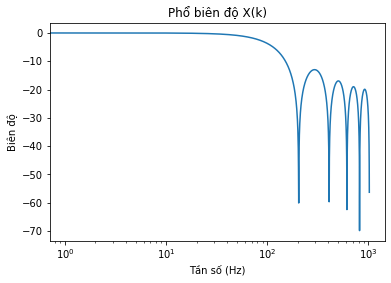

In [54]:
a = [1]
M = 10
b = 1/M*np.ones(M)
w, H = signal.freqz(b, a, worN=1024, whole=False)
plt.semilogx(20*np.log10(np.abs(H)))
plt.title('Phổ biên độ X(k)') 
plt.xlabel('Tần số (Hz)')
plt.ylabel('Biên độ')


Bài 6a: <br>
Vẽ đáp ứng biên độ và đáp ứng pha của bộ lọc sau: <br>
$y(n) = x(n) – 1.9021x(n-1) + x(n-2) + 1.8523y(n-1) – 0.94833y(n-2) $ <br>
Cho biết đây là lọc gì?

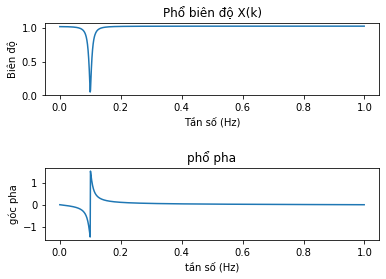

In [55]:


a = [1, -1.8523, 0.94833]
b = [1, -1.9021, 1]

w, H = signal.freqz(b, a, worN=1024, whole=False)
plt.subplot(2,1,1)
plt.plot(w/np.pi, np.abs(H))
plt.title('Phổ biên độ X(k)') 
plt.xlabel('Tần số (Hz)')
plt.ylabel('Biên độ')

plt.subplot(2,1,2)
plt.plot(w/np.pi, np.angle(H))
plt.title('phổ pha')
plt.xlabel('tần số (Hz)')
plt.ylabel('góc pha')
plt.subplots_adjust(hspace=1)


#lọc giải chặn

Bài 6b: <br>
Vẽ lại đáp ứng vẽ lại đáp ứng bộ lọc theo Hz với chu kì lấy mẫu T = 1/100

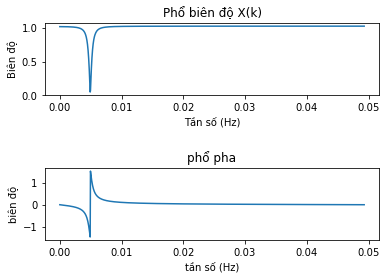

In [56]:
import matplotlib.pyplot as plt
from scipy import signal
import numpy as np

a = [1, -1.8523, 0.94833]
b = [1, -1.9021, 1]
T = 1/100

w, H = signal.freqz(b, a, worN=1024, whole=False)
plt.subplot(2,1,1)
plt.plot(w/2*np.pi*T, np.abs(H))
plt.title('Phổ biên độ X(k)') 
plt.xlabel('Tần số (Hz)')
plt.ylabel('Biên độ')

plt.subplot(2,1,2)
plt.plot(w/2*np.pi*T, np.angle(H))
plt.title('phổ pha')
plt.xlabel('tần số (Hz)')
plt.ylabel('biên độ')
plt.subplots_adjust(hspace=1)


Bài 7: <br>
Vẽ đáp ứng của bộ lọc sau theo dB <br>
$y(n)= -0.231x(n-1) + 0.462x(n-2)-2.231x(n-3)$ <br>
Cho biết đây là loại lọc gì?

Text(0, 0.5, 'Biên độ')

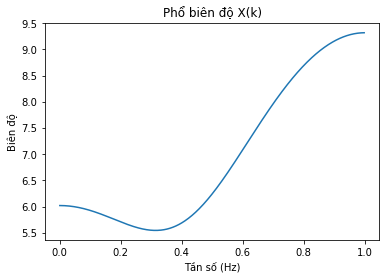

In [57]:
import matplotlib.pyplot as plt
from scipy import signal
import numpy as np

a = [1]
b = [ -0.231, 0.462, -2.231]

w, H = signal.freqz(b, a, worN=512)
plt.plot(w/np.pi, 20*np.log10(np.abs(H)))

plt.title('Phổ biên độ X(k)') 
plt.xlabel('Tần số (Hz)')
plt.ylabel('Biên độ')

#lọc thông cao

Bài 8: <br>
Viết tiếp đoạn chương trình để thực hiện lọc tín hiệu s với bộ lọc cho sẵn. <br>
a. Vẽ đáp ứng tần số của bộ lọc ở tần số Hz <br>
b. Vẽ phổ tín hiệu vào và ra trên cùng 1 đồ thị. Nhận xét kết quả

C:\Users\Laptop Nam phong\AppData\Local\Temp\ipykernel_1204\2696560644.py:6: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs, s = wavfile.read(file_name)


Text(0, 0.5, 'Biên độ')

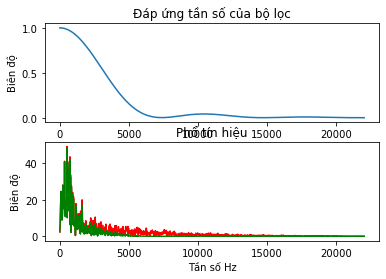

In [58]:
from scipy.io import wavfile
a = [1]
b = [0.01366865, 0.04127846, 0.06916209, 0.09721088, 0.12531517, 0.15336474, \
     0.15336474, 0.12531517, 0.09721088, 0.06916209, 0.04127846, 0.01366865]
file_name= '180960__kleeb__gunshot.wav'
fs, s = wavfile.read(file_name)
s = s[:,0] #Lấy 1 kênh
N = len(s)
T = 1/fs
#Tín hiệu sau lọc y =
y = signal.lfilter(b, a, s)
#Tìm w, và H của bộ lọc
w, H = signal.freqz(b, a, worN = 1024, whole = False)
plt.subplot(2,1,1)
plt.plot(w/(2*np.pi*T), abs(H))
plt.title('Đáp ứng tần số của bộ lọc') 
plt.xlabel('Tần số Hz')
plt.ylabel('Biên độ')
#Tìm w và vẽ phổ của tín hiệu s, y
w1, S = signal.freqz(s, 1, worN = 1024, whole = False)
w2, Y = signal.freqz(y, 1, worN = 1024, whole = False)
plt.subplot(2,1,2)
plt.plot(w/(2*np.pi*T), abs(S)/N, 'r')
plt.plot(w/(2*np.pi*T), abs(Y)/N, 'g')
plt.title('Phổ tín hiệu') 
plt.xlabel('Tần số Hz')
plt.ylabel('Biên độ')

In [59]:
#Nhận xét: từ phần tần số cắt trở đi hầu như không còn nhiễu